In [1]:
!pip install mtcnn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 23.8 MB/s eta 0:00:00


In [2]:
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2 # opencv
from mtcnn.mtcnn import MTCNN
from matplotlib import pyplot as plt
from keras.models import load_model
from PIL import Image

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

# Any results you write to the current directory are saved as output.

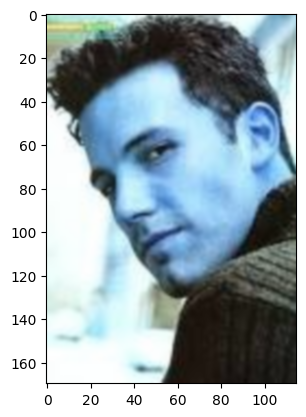

(170, 115, 3)


In [5]:
img = cv2.imread('/content/drive/MyDrive/5-celebrity-faces-dataset/data/train/ben_afflek/httpcsvkmeuaeccjpg.jpg')
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
#plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
print(img.shape)

1/1 [==============================] - 0s 164ms/step


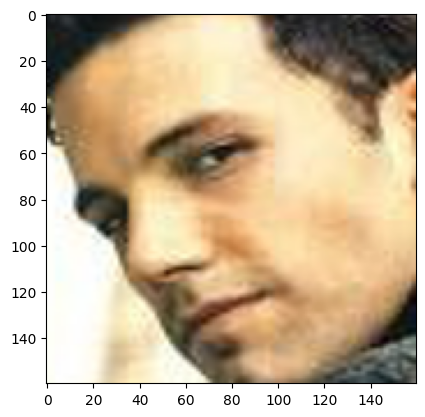

(160, 160, 3)


In [6]:
# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # deal with negative pixel index
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

# load the photo and extract the face
pixels = extract_face('/content/drive/MyDrive/5-celebrity-faces-dataset/data/train/ben_afflek/httpcsvkmeuaeccjpg.jpg')
plt.imshow(pixels)
plt.show()
print(pixels.shape)

In [7]:
def load_face(dir):
    faces = list()
    # enumerate files
    for filename in os.listdir(dir):
        path = dir + filename
        face = extract_face(path)
        faces.append(face)
    return faces

def load_dataset(dir):
    # list for faces and labels
    X, y = list(), list()
    for subdir in os.listdir(dir):
        path = dir + subdir + '/'
        faces = load_face(path)
        labels = [subdir for i in range(len(faces))]
        print("loaded %d sample for class: %s" % (len(faces),subdir) ) # print progress
        X.extend(faces)
        y.extend(labels)
    return np.asarray(X), np.asarray(y)


# load train dataset
trainX, trainy = load_dataset('/content/drive/MyDrive/5-celebrity-faces-dataset/data/train/')
print(trainX.shape, trainy.shape)
# load test dataset
testX, testy = load_dataset('/content/drive/MyDrive/5-celebrity-faces-dataset/data/val/')
print(testX.shape, testy.shape)

# save and compress the dataset for further use
np.savez_compressed('5-celebrity-faces-dataset.npz', trainX, trainy, testX, testy)

1/1 [==============================] - 0s 121ms/step


1/1 [==============================] - 0s 316ms/step
loaded 17 sample for class: elton_john
1/1 [==============================] - 0s 242ms/step
loaded 21 sample for class: jerry_seinfeld
1/1 [==============================] - 0s 165ms/step
loaded 22 sample for class: mindy_kaling
1/1 [==============================] - 0s 177ms/step
loaded 19 sample for class: madonna
1/1 [==============================] - 0s 158ms/step
loaded 14 sample for class: ben_afflek
(93, 160, 160, 3) (93,)
1/1 [==============================] - 0s 150ms/step
loaded 5 sample for class: mindy_kaling
1/1 [==============================] - 0s 220ms/step
loaded 5 sample for class: madonna
1/1 [==============================] - 0s 144ms/step
loaded 5 sample for class: jerry_seinfeld
1/1 [==============================] - 0s 170ms/step
loaded 5 sample for class: elton_john
1/1 [==============================] - 0s 155ms/step
loaded 5 sample for class: ben_afflek
(25, 160, 160, 3) (25,)


In [8]:
# convert array into dataframe
arr = np.load('/content/5-celebrity-faces-dataset.npz')
DF = pd.DataFrame(arr)

# save the dataframe as a csv file
DF.to_csv("FaceDatabase.csv")

In [9]:
print(trainX.shape)

(93, 160, 160, 3)


In [10]:
print(trainy.shape)

(93,)


In [11]:
# load the face dataset
data = np.load('5-celebrity-faces-dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

Loaded:  (93, 160, 160, 3) (93,) (25, 160, 160, 3) (25,)


In [ ]:
# load the facenet model
facenet_model = load_model('/content/drive/MyDrive/facenet_keras.h5')
print('Loaded Model')

ValueError: ignored

In [12]:
!pip install keras-facenet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10370 sha256=fc857029a4bc0bac9efc15d7f528493efbb53bb5348f6a2eef54caea56908cb8
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras-facenet


In [13]:
from keras_facenet import FaceNet
facenet_model = FaceNet()

In [33]:
# test with two different images
emd1 = get_embedding(facenet_model, trainX[0])
emd2 = get_embedding(facenet_model, trainX[1])

# Check if the embeddings are different
print(np.array_equal(emd1, emd2))  # this should print False if the embeddings are different


1/1 [==============================] - 0s 115ms/step
True


In [17]:
def get_embedding(model, face):
    # scale pixel values
    face = face.astype('float32')
    # standardization
    mean, std = face.mean(), face.std()
    face = (face-mean)/std
    # transfer face into one sample (3 dimension to 4 dimension)
    sample = np.expand_dims(face, axis=0)
    # make prediction to get embedding
    yhat = model.embeddings(sample)
    return yhat[0]

# convert each face in the train set into embedding
emdTrainX = list()
for face in trainX:
    emd = get_embedding(facenet_model, face)
    emdTrainX.append(emd)

emdTrainX = np.asarray(emdTrainX)
print(emdTrainX.shape)

# convert each face in the test set into embedding
emdTestX = list()
for face in testX:
    emd = get_embedding(facenet_model, face)
    emdTestX.append(emd)
emdTestX = np.asarray(emdTestX)
print(emdTestX.shape)

# save arrays to one file in compressed format
np.savez_compressed('5-celebrity-faces-embeddings.npz', emdTrainX, trainy, emdTestX, testy)

1/1 [==============================] - 0s 166ms/step
(93, 512)
1/1 [==============================] - 0s 97ms/step
(25, 512)


In [30]:
# Load the csv files into dataframes
df_0 = pd.read_csv('/content/arr_0.csv', header=None)

df_0.columns = range(1, len(df_0.columns)+1)

# Add a new column at the beginning of each dataframe
df_0.insert(0, 0, 'ben_afflek')

print(df_0)


             0                                                  1
0   ben_afflek  1.040818076580762863e-02 1.323741115629673004e...
1   ben_afflek  1.040818076580762863e-02 1.323741115629673004e...
2   ben_afflek  1.040818076580762863e-02 1.323741115629673004e...
3   ben_afflek  1.040818076580762863e-02 1.323741115629673004e...
4   ben_afflek  1.040818076580762863e-02 1.323741115629673004e...
..         ...                                                ...
88  ben_afflek  1.040818076580762863e-02 1.323741115629673004e...
89  ben_afflek  1.040818076580762863e-02 1.323741115629673004e...
90  ben_afflek  1.040818076580762863e-02 1.323741115629673004e...
91  ben_afflek  1.040818076580762863e-02 1.323741115629673004e...
92  ben_afflek  1.040818076580762863e-02 1.323741115629673004e...

[93 rows x 2 columns]


In [31]:
df_0.to_csv('FaceDB.csv', index=False, header=False)


In [32]:
import pandas as pd

data = np.load("/content/5-celebrity-faces-embeddings.npz")
for key, value in data.items():
    pd.DataFrame(value).to_csv("/content/" + key + ".csv", index=False)
